<a href="https://colab.research.google.com/github/RafaelTorresDias/Trabalho_Python2/blob/master/Antes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> IMPORTANTE! </font>
O meu código foi feito do Jupyter e rodou perfeitamente, o nome do arquivo txt é ("dados_farmacos.txt") e o mesmo foi carregado sem problemas.
Qualquer dúvida sobre rodar o código me pergunte por e_mail: rafaeltorresdias@yahoo.com.br

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Questão 01
Utilizando os dados experimentais, faça um gráfico relacionando o tempo transcorrido e a concentração de fármaco no sangue de cada paciente.

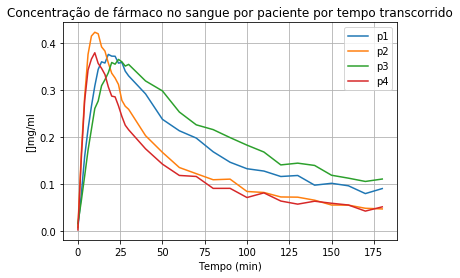

In [0]:
peso = np.array([82,73,85,68])
sexo = [0,1,1,0] #Considerei Feminino como zero e masculino como 1
a = np.loadtxt("dados_farmacos.txt") 
b = np.transpose(a)#pode usar também tempo = a[:,0], b = a[:,1:5]
tempo = np.array(b[0])
p1 = np.array(b[1])
p2 = np.array(b[2])
p3 = np.array(b[3])
p4 = np.array(b[4])
plt.plot(tempo,p1,tempo,p2,tempo,p3,tempo,p4)
plt.title("Concentração de fármaco no sangue por paciente por tempo transcorrido")
plt.xlabel("Tempo (min)")
plt.ylabel("[]mg/ml")
plt.legend(["p1","p2","p3","p4"])
plt.grid()

# Questão 02
Construa uma figura contendo 3 gráficos de barras da seguinte forma:

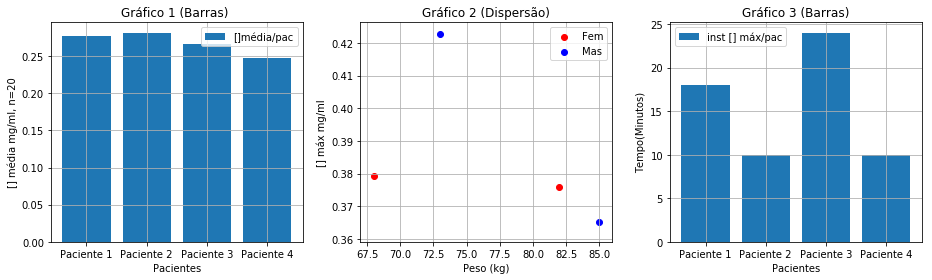

In [0]:
#Gráfico 1: Gráfico de barras contendo a concentração média das 20 primeiras amostras coletadas de cada paciente.
plt.figure(figsize=(13,4))
x=np.arange(0,4)
pp1 = []
pp2 = []
pp3 = []
pp4 = []

for i in range(20):
    pp1.append(p1[i])
    pp2.append(p2[i])
    pp3.append(p3[i])
    pp4.append(p4[i])

a = [np.mean(np.array(pp1)),np.mean(np.array(pp2)),np.mean(np.array(pp3)),np.mean(np.array(pp4))]
plt.subplot(1,3,1)
plt.bar(x,a)
plt.xticks(x, ['Paciente 1','Paciente 2', 'Paciente 3', 'Paciente 4']);
plt.title("Gráfico 1 (Barras) ")
plt.xlabel("Pacientes")
plt.ylabel("[] média mg/ml, n=20")
plt.legend(["[]média/pac"])
plt.grid()
plt.tight_layout()

#Gráfico 2: Gráfico de dispersão relacionando o peso de cada paciente à sua máxima concentração atingida. Use cores diferentes para diferenciar o sexo do paciente.
pmax = np.array ([np.max(p1),np.max(p2),np.max(p3),np.max(p4)])
plt.subplot(1,3,2)
for i in range(len(peso)):
    if sexo[i]==0:
        s = "red"
    else:
        s ="blue"
    plt.scatter(peso[i],pmax[i],color=s)   
plt.title("Gráfico 2 (Dispersão)")
plt.xlabel("Peso (kg)")
plt.ylabel("[] máx mg/ml")
plt.legend(["Fem","Mas"])
plt.grid()
plt.tight_layout()

#Gráfico 3: Gráfico de barras contendo o instante no qual a máxima concentração de cada paciente ocorre. (lembre-se que para localizar um elemento você deve converter o numpy array em uma lista e localizar o índice através do comando lista.index(valor)).
instante= []
x=np.arange(0,4)

instante.append(tempo[p1.tolist().index(pmax[0])])
instante.append(tempo[p2.tolist().index(pmax[1])])
instante.append(tempo[p3.tolist().index(pmax[2])])
instante.append(tempo[p4.tolist().index(pmax[3])])

plt.subplot(1,3,3)
plt.bar(x,instante)
plt.xticks(x, ['Paciente 1','Paciente 2', 'Paciente 3', 'Paciente 4',]);
plt.title("Gráfico 3 (Barras)")
plt.xlabel("Pacientes")
plt.ylabel("Tempo(Minutos)")
plt.legend(["inst [] máx/pac"])
plt.grid()
plt.savefig("Figura_Trab02.png")


# Questão 03
Faça um gráfico de concentração versus tempo contendo os dados experimentais do paciente 3 e o resultado estimado por cada modelo. Com base na análise visual, qual modelo melhor representa os dados?

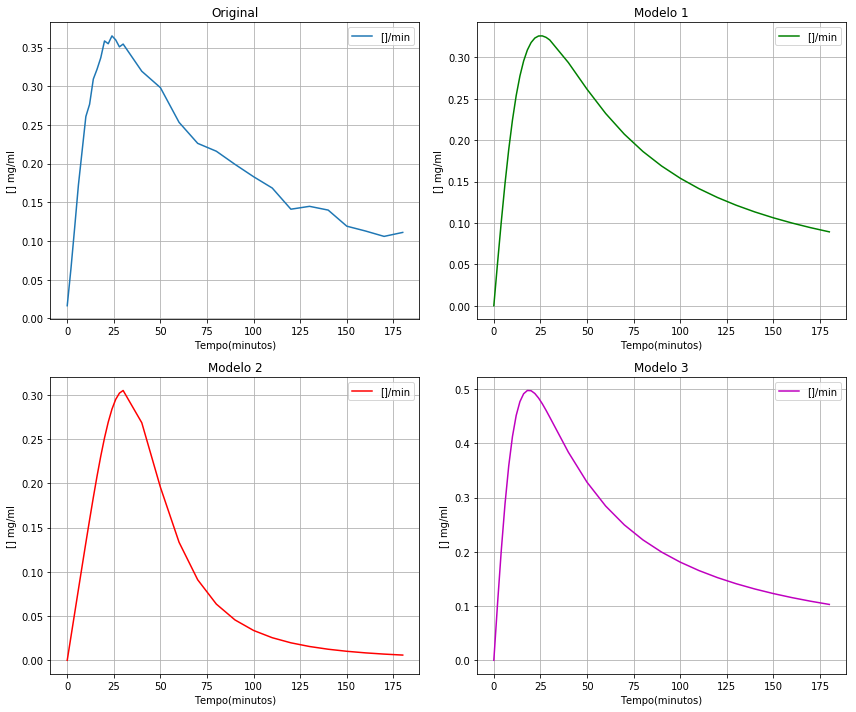

In [0]:
m1 = (0.065*tempo) / (((0.063*tempo)**2)+2.5)
m2 = (0.028*tempo) / (((0.03*tempo)**4)+2.1)
m3 = (tempo) / (9*(((0.077*tempo)**2) + 2.1))

plt.figure(figsize=(12,10))
#Original
plt.subplot(2,2,1)
plt.plot(tempo,p3)
plt.title("Original")
plt.xlabel("Tempo(minutos)")
plt.ylabel("[] mg/ml")
plt.legend(["[]/min"])
plt.grid()
plt.tight_layout()

#Modelo 01
plt.subplot(2,2,2)
plt.plot(tempo,m1,"g")
plt.title("Modelo 1")
plt.xlabel("Tempo(minutos)")
plt.ylabel("[] mg/ml")
plt.legend(["[]/min"])
plt.grid()
plt.tight_layout()

#Modelo 02
plt.subplot(2,2,3)
plt.plot(tempo,m2,"r")
plt.title("Modelo 2")
plt.xlabel("Tempo(minutos)")
plt.ylabel("[] mg/ml")
plt.legend(["[]/min"])
plt.grid()
plt.tight_layout()

#Modelo 03
plt.subplot(2,2,4)
plt.plot(tempo,m3,"m")
plt.title("Modelo 3")
plt.xlabel("Tempo(minutos)")
plt.ylabel("[] mg/ml")
plt.legend(["[]/min"])
plt.grid()
plt.tight_layout()

###  <font color=red> Resposta questão 03: </font>:
Acho que o primeiro modelo tendo em vista a forma e aproximação de valores

# Questão 4
Calcule o RMSE para os modelos apresentado no item anterior considerando os dados do Paciente 3 e indique qual o melhor modelo para representar esses dados.

In [0]:
def rmse(a, b):
    return np.sqrt(((a - b) ** 2).mean())

rmse_val = rmse(np.array(p3), np.array(m1))
print("Modelo 1 o erro de rms é: " + str(rmse_val))
rmse_val = rmse(np.array(p3), np.array(m2))
print("Modelo 2 o erro de rms é: " + str(rmse_val))
rmse_val = rmse(np.array(p3), np.array(m3))
print("Modelo 3 o erro de rms é: " + str(rmse_val))

Modelo 1 o erro de rms é: 0.026694384512307455
Modelo 2 o erro de rms é: 0.10754841288052355
Modelo 3 o erro de rms é: 0.09350552476502559


### <font color=red> Resposta questão 04: </font>:
O melhor modelo para representar os dados é o modelo 01